<a href="https://colab.research.google.com/github/Someshwarms/Uber-taxi-trip-price-prediction/blob/main/Uber_taxi_trip_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from geopy.distance import great_circle

**Importing all the files and packages which is needed for this project.Link of the dataset::https://www.kaggle.com/sanjaysuthraye96/uber-location-price-data.** 

In [2]:
df=pd.read_excel("/content/drive/MyDrive/Copy of cleaned_2.xlsx")
df.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0.0,10.5,2011-04-18 19:55:00,-73.984565,40.745372,-73.951843,40.777743,5.0
1,1.0,12.0,2014-01-09 07:48:00,-73.991572,40.749877,-73.964142,40.757180,1.0
2,2.0,9.0,2014-09-14 01:14:00,-74.000412,40.718410,-73.999255,40.719967,2.0
3,3.0,9.3,2012-03-18 15:04:01,-73.991999,40.719834,-73.983515,40.743818,1.0
4,4.0,8.5,2012-02-06 13:09:00,-73.966765,40.761547,-73.990493,40.750787,1.0


In [3]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [4]:
df.shape

(205671, 8)

**As we can see there 1 null value in each column lets drop that column because the dataset has more then 2 lakh rows it will not effect the dataset.**

In [5]:
df.isnull().sum()

Unnamed: 0           1
fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [10]:
df.dropna(inplace=True)

**Feature Extraction from date,longitude,and latitude columns**

In [11]:
df.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0.0,10.5,2011-04-18 19:55:00,-73.984565,40.745372,-73.951843,40.777743,5.0
1,1.0,12.0,2014-01-09 07:48:00,-73.991572,40.749877,-73.964142,40.757180,1.0
2,2.0,9.0,2014-09-14 01:14:00,-74.000412,40.718410,-73.999255,40.719967,2.0
3,3.0,9.3,2012-03-18 15:04:01,-73.991999,40.719834,-73.983515,40.743818,1.0
4,4.0,8.5,2012-02-06 13:09:00,-73.966765,40.761547,-73.990493,40.750787,1.0


**Extracting feature distance with the help of pickup and dropoff longitude and lattitude column of the dataset with the help package called geopy**

In [12]:
def calculate_distance(pick_lat,pick_long,drop_lat,drop_long):
  start_coordinates=(pick_lat,pick_long)
  stop_coordinates=(drop_lat,drop_long)
  return great_circle(start_coordinates,stop_coordinates).km


df['distance']=df.apply(lambda x:calculate_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [13]:
df.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,0.0,10.5,2011-04-18 19:55:00,-73.984565,40.745372,-73.951843,40.777743,5.0,4.533385
1,1.0,12.0,2014-01-09 07:48:00,-73.991572,40.749877,-73.964142,40.757180,1.0,2.449062
2,2.0,9.0,2014-09-14 01:14:00,-74.000412,40.718410,-73.999255,40.719967,2.0,0.198701
3,3.0,9.3,2012-03-18 15:04:01,-73.991999,40.719834,-73.983515,40.743818,1.0,2.761051
4,4.0,8.5,2012-02-06 13:09:00,-73.966765,40.761547,-73.990493,40.750787,1.0,2.329361


**Using datetime from pandas extracting hour,day,month,etc features from the pickup datetime columns of the dataset**

In [16]:
df['pickup_hour']=pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S").dt.hour 
df['pickup_month']=pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S").dt.month
df['pickup_day_no']=pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S").dt.weekday
df['pickup_year']=pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S").dt.year

In [17]:
df.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_hour,pickup_month,pickup_day_no,pickup_day,pickup_year
0,0.0,10.5,2011-04-18 19:55:00,-73.984565,40.745372,-73.951843,40.777743,5.0,4.533385,19,4,0,<bound method PandasDelegate._add_delegate_acc...,2011
1,1.0,12.0,2014-01-09 07:48:00,-73.991572,40.749877,-73.964142,40.757180,1.0,2.449062,7,1,3,<bound method PandasDelegate._add_delegate_acc...,2014
2,2.0,9.0,2014-09-14 01:14:00,-74.000412,40.718410,-73.999255,40.719967,2.0,0.198701,1,9,6,<bound method PandasDelegate._add_delegate_acc...,2014
3,3.0,9.3,2012-03-18 15:04:01,-73.991999,40.719834,-73.983515,40.743818,1.0,2.761051,15,3,6,<bound method PandasDelegate._add_delegate_acc...,2012
4,4.0,8.5,2012-02-06 13:09:00,-73.966765,40.761547,-73.990493,40.750787,1.0,2.329361,13,2,0,<bound method PandasDelegate._add_delegate_acc...,2012


In [19]:
df.drop('pickup_day',axis=1,inplace=True)

In [20]:
df.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_hour,pickup_month,pickup_day_no,pickup_year
0,0.0,10.5,2011-04-18 19:55:00,-73.984565,40.745372,-73.951843,40.777743,5.0,4.533385,19,4,0,2011
1,1.0,12.0,2014-01-09 07:48:00,-73.991572,40.749877,-73.964142,40.757180,1.0,2.449062,7,1,3,2014
2,2.0,9.0,2014-09-14 01:14:00,-74.000412,40.718410,-73.999255,40.719967,2.0,0.198701,1,9,6,2014
3,3.0,9.3,2012-03-18 15:04:01,-73.991999,40.719834,-73.983515,40.743818,1.0,2.761051,15,3,6,2012
4,4.0,8.5,2012-02-06 13:09:00,-73.966765,40.761547,-73.990493,40.750787,1.0,2.329361,13,2,0,2012


In [21]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)

In [22]:
df.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_hour,pickup_month,pickup_day_no,pickup_year,pickup_timeofday
0,0.0,10.5,2011-04-18 19:55:00,-73.984565,40.745372,-73.951843,40.777743,5.0,4.533385,19,4,0,2011,Evening
1,1.0,12.0,2014-01-09 07:48:00,-73.991572,40.749877,-73.964142,40.757180,1.0,2.449062,7,1,3,2014,Morning
2,2.0,9.0,2014-09-14 01:14:00,-74.000412,40.718410,-73.999255,40.719967,2.0,0.198701,1,9,6,2014,Late night
3,3.0,9.3,2012-03-18 15:04:01,-73.991999,40.719834,-73.983515,40.743818,1.0,2.761051,15,3,6,2012,Afternoon
4,4.0,8.5,2012-02-06 13:09:00,-73.966765,40.761547,-73.990493,40.750787,1.0,2.329361,13,2,0,2012,Afternoon


**Data Visulization**

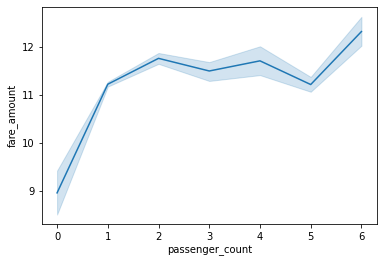

In [53]:
sns.lineplot(x='passenger_count',y='fare_amount',data=df)

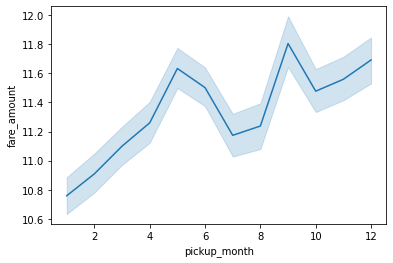

In [47]:
sns.lineplot(x='pickup_month',y='fare_amount',data=df)

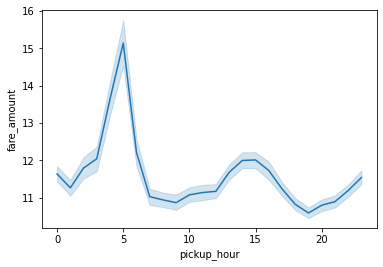

In [48]:
sns.lineplot(x='pickup_hour',y='fare_amount',data=df)

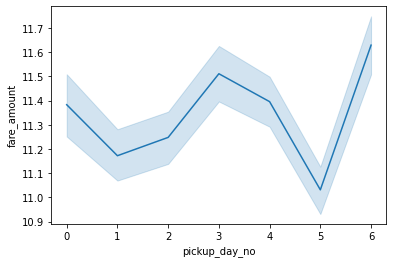

In [49]:
sns.lineplot(x='pickup_day_no',y='fare_amount',data=df)

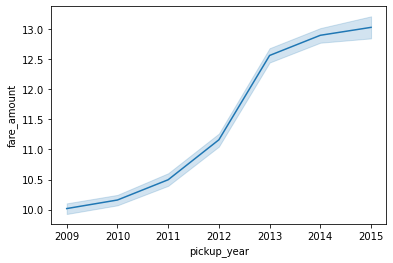

In [50]:
sns.lineplot(x='pickup_year',y='fare_amount',data=df)

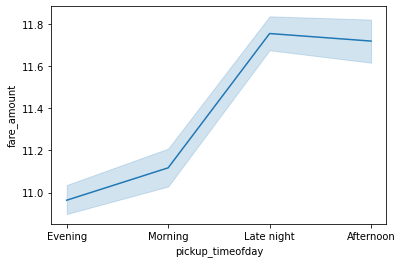

In [51]:
sns.lineplot(x='pickup_timeofday',y='fare_amount',data=df)

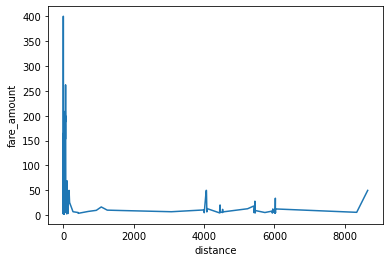

In [52]:
sns.lineplot(x='distance',y='fare_amount',data=df)

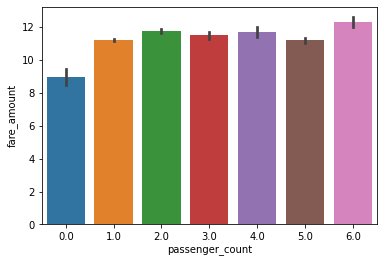

In [55]:
sns.barplot(x='passenger_count',y='fare_amount',data=df)

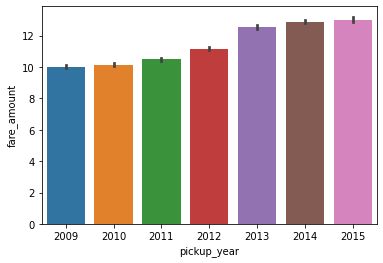

In [56]:
sns.barplot(x='pickup_year',y='fare_amount',data=df)

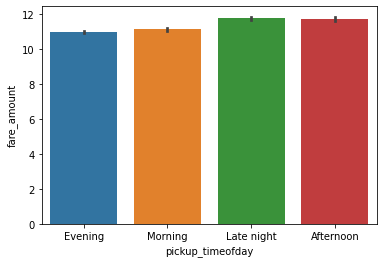

In [57]:
sns.barplot(x='pickup_timeofday',y='fare_amount',data=df)

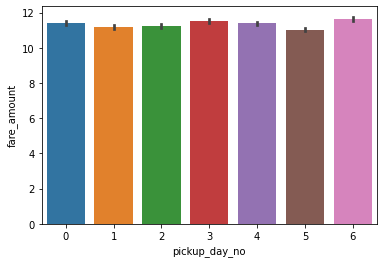

In [58]:
sns.barplot(x='pickup_day_no',y='fare_amount',data=df)

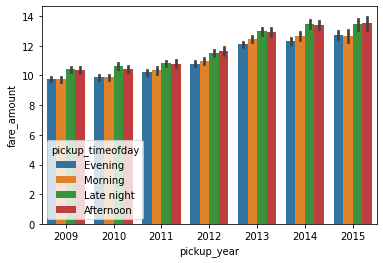

In [59]:
sns.barplot(x='pickup_year',y='fare_amount',hue='pickup_timeofday',data=df)

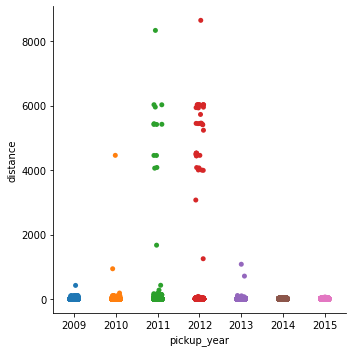

In [46]:
sns.catplot(y='distance',x='pickup_year',data=df,kind="strip")

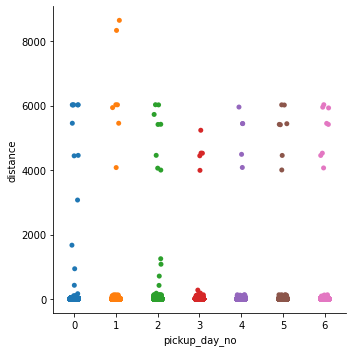

In [45]:
sns.catplot(y='distance',x='pickup_day_no',data=df,kind="strip")

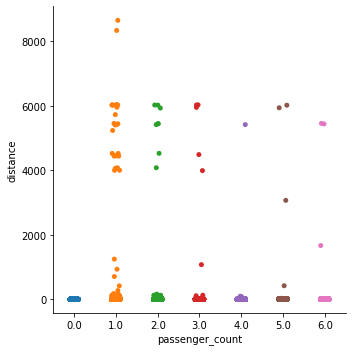

In [44]:
sns.catplot(y='distance',x='passenger_count',data=df,kind="strip")

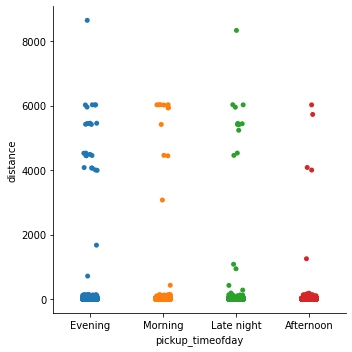

In [43]:
sns.catplot(y='distance',x='pickup_timeofday',data=df,kind="strip")

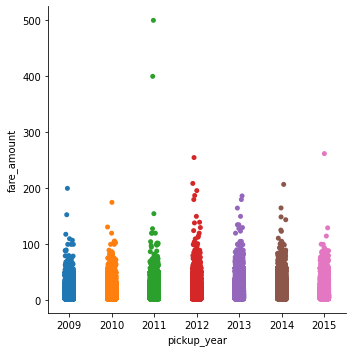

In [42]:
sns.catplot(y='fare_amount',x='pickup_year',data=df,kind="strip")

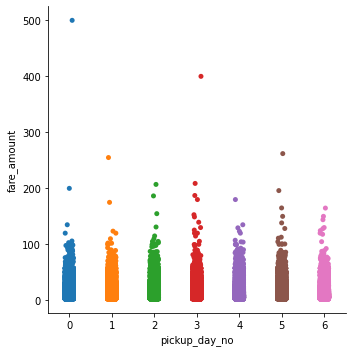

In [41]:
sns.catplot(y='fare_amount',x='pickup_day_no',data=df,kind="strip")

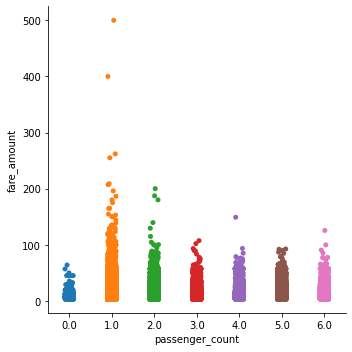

In [40]:
sns.catplot(y='fare_amount',x='passenger_count',data=df,kind="strip")

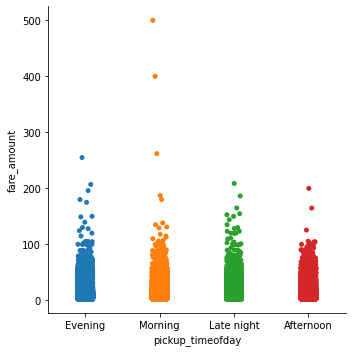

In [39]:
sns.catplot(y='fare_amount',x='pickup_timeofday',data=df,kind="strip")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


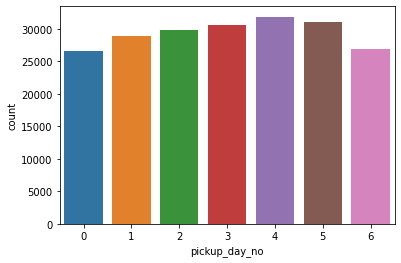

In [38]:
sns.countplot('pickup_day_no',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


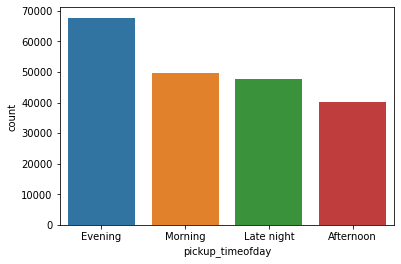

In [37]:
sns.countplot('pickup_timeofday',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


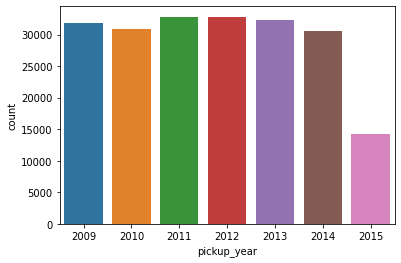

In [36]:
sns.countplot('pickup_year',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


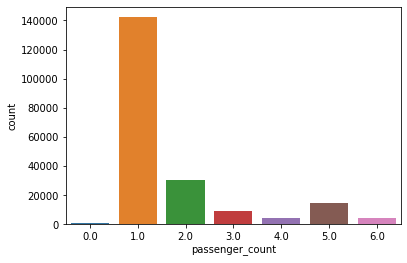

In [34]:
sns.countplot('passenger_count',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


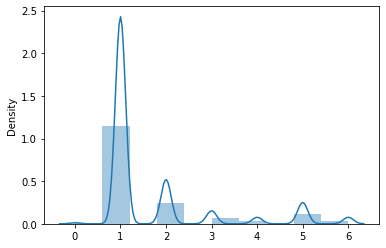

In [35]:
sns.distplot(x=df['passenger_count'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


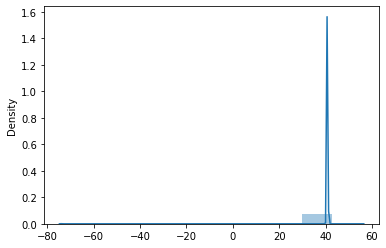

In [30]:
sns.distplot(x=df['dropoff_latitude'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


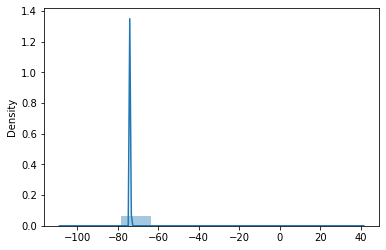

In [31]:
sns.distplot(x=df['dropoff_longitude'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


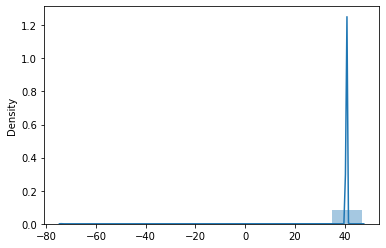

In [32]:
sns.distplot(x=df['pickup_latitude'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


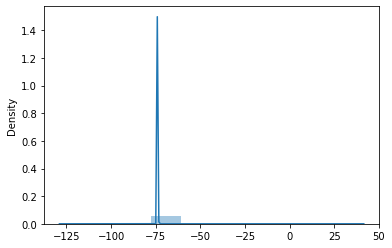

In [33]:
sns.distplot(x=df['pickup_longitude'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


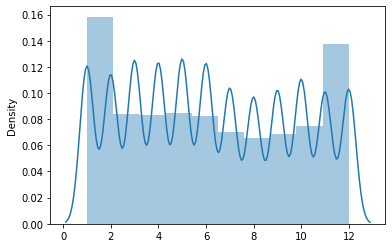

In [28]:
sns.distplot(x=df['pickup_month'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


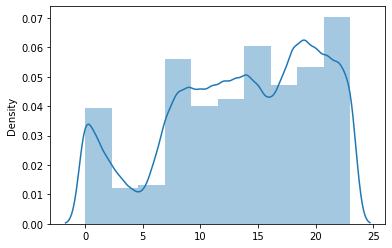

In [29]:
sns.distplot(x=df['pickup_hour'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


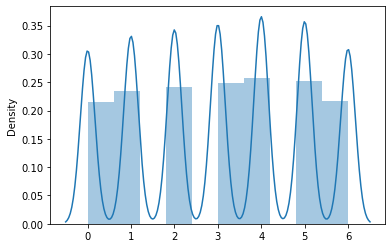

In [27]:
sns.distplot(x=df['pickup_day_no'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


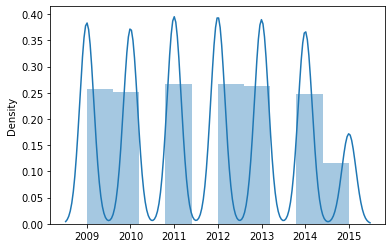

In [26]:
sns.distplot(x=df['pickup_year'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


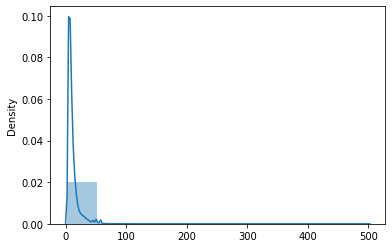

In [23]:
sns.distplot(x=df['fare_amount'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


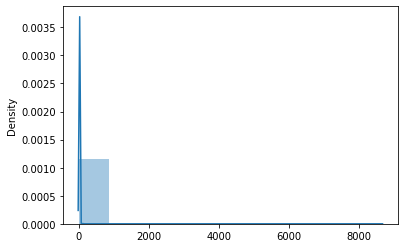

In [24]:
sns.distplot(x=df['distance'],bins = 10)

**Lets convert all the categorical data into numerical data** 

In [60]:
df['pickup_timeofday'].value_counts()

Evening       67743
Morning       49706
Late night    47864
Afternoon     40357
Name: pickup_timeofday, dtype: int64

In [61]:
df['pickup_timeofday'].replace(to_replace="Evening",value=1,inplace=True)
df['pickup_timeofday'].replace(to_replace="Morning",value=2,inplace=True)
df['pickup_timeofday'].replace(to_replace="Late night",value=3,inplace=True)
df['pickup_timeofday'].replace(to_replace="Afternoon",value=4,inplace=True)

In [62]:
df['pickup_timeofday'].value_counts()

1    67743
2    49706
3    47864
4    40357
Name: pickup_timeofday, dtype: int64

**Lets divide the dataset into independent and dependent fetaure**

In [63]:
df.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_hour,pickup_month,pickup_day_no,pickup_year,pickup_timeofday
0,0.0,10.5,2011-04-18 19:55:00,-73.984565,40.745372,-73.951843,40.777743,5.0,4.533385,19,4,0,2011,1
1,1.0,12.0,2014-01-09 07:48:00,-73.991572,40.749877,-73.964142,40.757180,1.0,2.449062,7,1,3,2014,2
2,2.0,9.0,2014-09-14 01:14:00,-74.000412,40.718410,-73.999255,40.719967,2.0,0.198701,1,9,6,2014,3
3,3.0,9.3,2012-03-18 15:04:01,-73.991999,40.719834,-73.983515,40.743818,1.0,2.761051,15,3,6,2012,4
4,4.0,8.5,2012-02-06 13:09:00,-73.966765,40.761547,-73.990493,40.750787,1.0,2.329361,13,2,0,2012,4


In [65]:
X=df.drop(['Unnamed: 0','pickup_datetime','fare_amount'],axis=1)#independent
y=df['fare_amount']#dependent

In [66]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_hour,pickup_month,pickup_day_no,pickup_year,pickup_timeofday
0,-73.984565,40.745372,-73.951843,40.777743,5.0,4.533385,19,4,0,2011,1
1,-73.991572,40.749877,-73.964142,40.757180,1.0,2.449062,7,1,3,2014,2
2,-74.000412,40.718410,-73.999255,40.719967,2.0,0.198701,1,9,6,2014,3
3,-73.991999,40.719834,-73.983515,40.743818,1.0,2.761051,15,3,6,2012,4
4,-73.966765,40.761547,-73.990493,40.750787,1.0,2.329361,13,2,0,2012,4


In [67]:
y.head()

0    10.5
1    12.0
2     9.0
3     9.3
4     8.5
Name: fare_amount, dtype: float64

In [68]:
X.shape

(205670, 11)

In [69]:
y.shape

(205670,)

**For Feature Selection using correlation**

In [75]:
X.corr()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,pickup_hour,pickup_month,pickup_day_no,pickup_year,pickup_timeofday
pickup_longitude,1.000000,-0.957328,0.948197,-0.955882,0.010128,0.142579,-0.002861,-0.007033,0.003931,0.012433,0.003986
pickup_latitude,-0.957328,1.000000,-0.959205,0.990253,-0.009403,-0.038933,0.002727,0.007769,-0.004208,-0.014188,-0.004053
dropoff_longitude,0.948197,-0.959205,1.000000,-0.961652,0.010161,0.129917,-0.003726,-0.007160,0.002967,0.012455,0.004542
dropoff_latitude,-0.955882,0.990253,-0.961652,1.000000,-0.009229,-0.033037,0.003206,0.007723,-0.004169,-0.014082,-0.004072
passenger_count,0.010128,-0.009403,0.010161,-0.009229,1.000000,0.002834,0.018653,0.007539,0.034750,0.004667,0.001951
distance,0.142579,-0.038933,0.129917,-0.033037,0.002834,1.000000,0.000218,-0.002554,-0.001348,0.000562,-0.003577
pickup_hour,-0.002861,0.002727,-0.003726,0.003206,0.018653,0.000218,1.000000,-0.002387,-0.090318,0.001115,-0.310833
pickup_month,-0.007033,0.007769,-0.007160,0.007723,0.007539,-0.002554,-0.002387,1.000000,-0.007831,-0.118386,0.004182
pickup_day_no,0.003931,-0.004208,0.002967,-0.004169,0.034750,-0.001348,-0.090318,-0.007831,1.000000,0.009144,0.067856
pickup_year,0.012433,-0.014188,0.012455,-0.014082,0.004667,0.000562,0.001115,-0.118386,0.009144,1.000000,0.002238


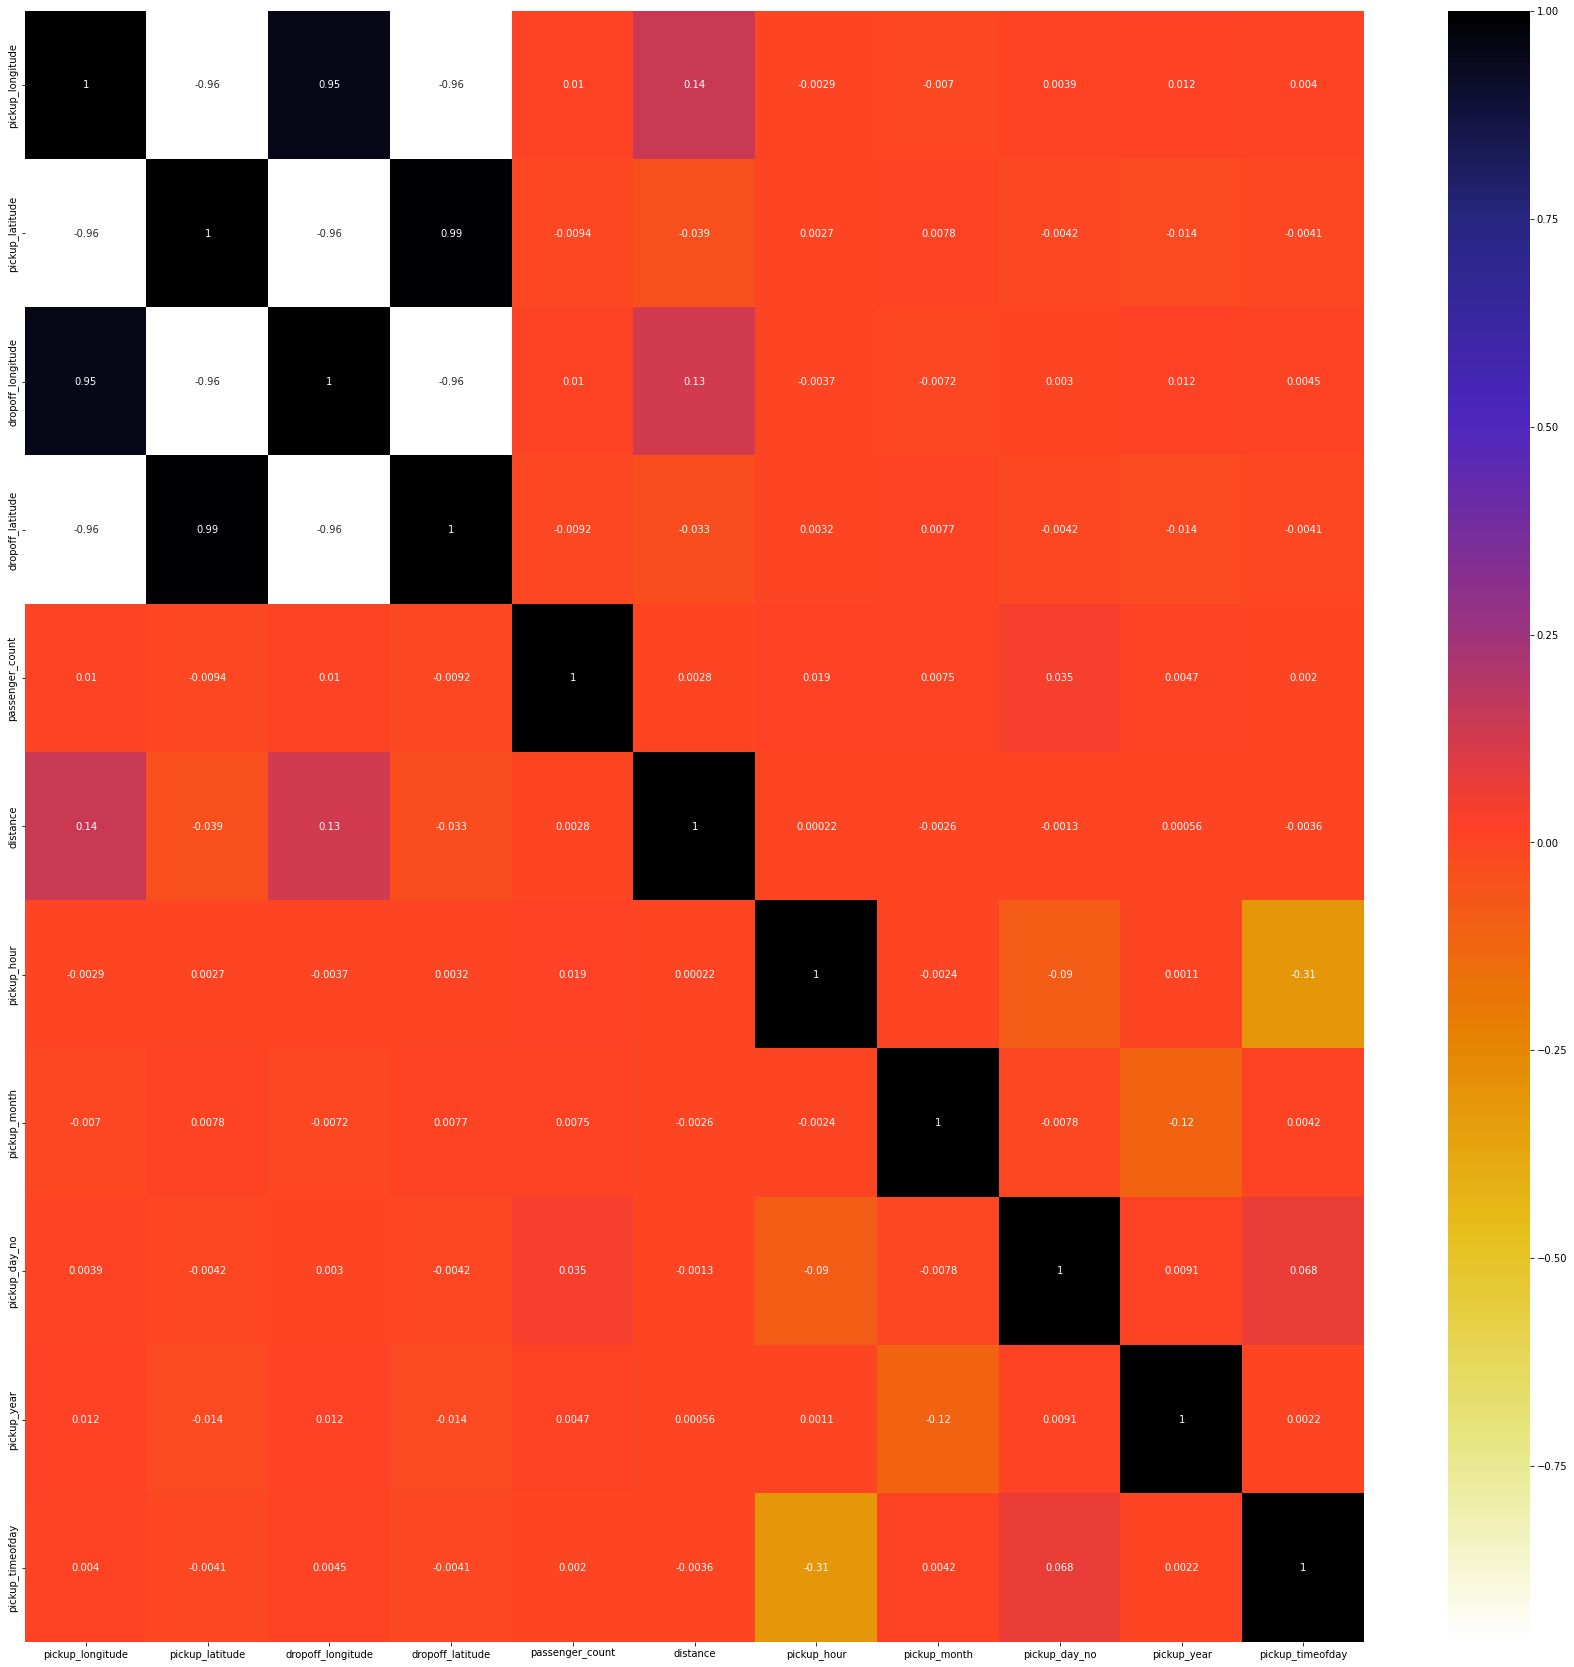

In [76]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [77]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [78]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

3

**This are the important feature so we will not drop this**

In [79]:
corr_features

{'dropoff_latitude', 'dropoff_longitude', 'pickup_latitude'}

**Diving independent and dependent feature into training and testing part**

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [71]:
X_train.shape

(143969, 11)

In [72]:
X_test.shape

(61701, 11)

In [73]:
y_train.shape

(143969,)

In [74]:
y_test.shape

(61701,)

**RandomForest Regressor**

In [80]:
rdf=RandomForestRegressor()
rdf.fit(X_train,y_train)
y_pred=rdf.predict(X_test)

In [81]:
y_pred

array([16.361,  9.559, 11.956, ...,  8.158,  5.724, 12.285])

In [82]:
r2_score(y_pred,y_test)

0.7700081182754925

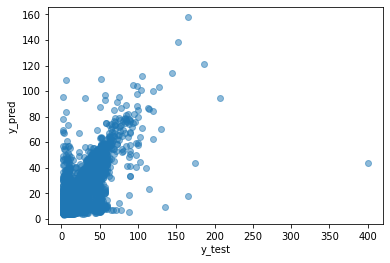

In [83]:
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
print("MSE:",mean_squared_error(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred,y_test)))

MSE: 18.131995009429996
MAE: 1.8791763763958444
RMSE: 1.3708305425528877


**AdaBoost Regressor**

In [88]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
y_pred1=ada.predict(X_test)

In [89]:
y_pred1

array([15.71074446, 15.60891351, 15.71074446, ..., 22.50433703,
       19.18993563, 19.18993563])

In [90]:
r2_score(y_pred1,y_test)

-1.4030281662125286

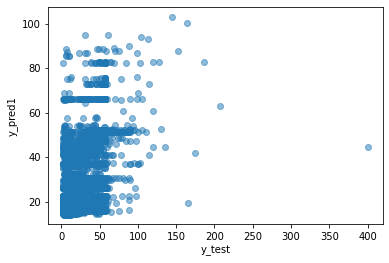

In [91]:
plt.scatter(y_test,y_pred1,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [92]:
print("MSE:",mean_squared_error(y_pred1,y_test))
print("MAE:",mean_absolute_error(y_pred1,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred1,y_test)))

MSE: 103.46746367362296
MAE: 8.475794778149433
RMSE: 2.9113218266192136


**GradientBoosting Regressor**

In [93]:
gdr=GradientBoostingRegressor()
gdr.fit(X_train,y_train)
y_pred2=gdr.predict(X_test)

In [94]:
y_pred2

array([15.2205672 , 10.04964204, 11.88555207, ...,  9.72856397,
        5.51559384, 12.65214798])

In [95]:
r2_score(y_pred2,y_test)

0.7364932055121789

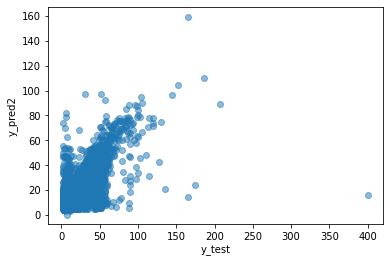

In [96]:
plt.scatter(y_test,y_pred2,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()

In [97]:
print("MSE:",mean_squared_error(y_pred2,y_test))
print("MAE:",mean_absolute_error(y_pred2,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred2,y_test)))

MSE: 19.554884584391818
MAE: 2.0467591307939994
RMSE: 1.4306498980512317


**LGBMRegressor**

In [98]:
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
y_pred3=lgbm.predict(X_test)

In [99]:
y_pred3

array([15.64247036,  9.44597236, 10.80283466, ...,  8.61978537,
        5.14026762, 13.36629776])

In [100]:
r2_score(y_pred3,y_test)

0.7643163903449774

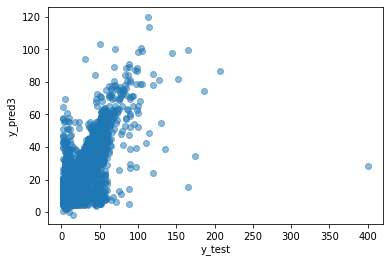

In [101]:
plt.scatter(y_test,y_pred3,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred3")
plt.show()

In [102]:
print("MSE:",mean_squared_error(y_pred3,y_test))
print("MAE:",mean_absolute_error(y_pred3,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred3,y_test)))

MSE: 18.06757930857971
MAE: 1.884508601029683
RMSE: 1.372774053160127


**XGBRegressor**

In [103]:
xgb=xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
y_pred4=xgb.predict(X_test)

[12:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [104]:
y_pred4

array([15.145244,  9.900656, 11.899386, ...,  9.661851,  5.573561,
       12.618862], dtype=float32)

In [105]:
r2_score(y_pred4,y_test)

0.7392420987198699

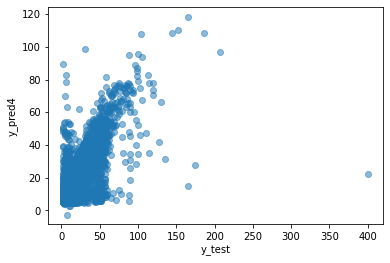

In [106]:
plt.scatter(y_test,y_pred4,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [107]:
print("MSE:",mean_squared_error(y_pred4,y_test))
print("MAE:",mean_absolute_error(y_pred4,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred4,y_test)))

MSE: 19.35345512468426
MAE: 2.047308697121118
RMSE: 1.430841953928217


**LinearRegression**

In [108]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred5=lr.predict(X_test)

In [109]:
y_pred5

array([10.66272181, 10.62583809, 10.00300694, ..., 11.60344091,
       11.15513793, 12.78847422])

In [110]:
r2_score(y_pred5,y_test)

-56.87979107724395

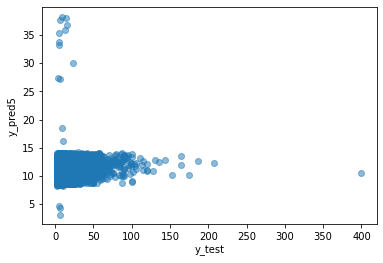

In [111]:
plt.scatter(y_test,y_pred5,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred5")
plt.show()

In [112]:
print("MSE:",mean_squared_error(y_pred5,y_test))
print("MAE:",mean_absolute_error(y_pred5,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred5,y_test)))

MSE: 94.99944277792929
MAE: 5.95245543277383
RMSE: 2.439765446261962


**Prediction using best performed Algorithms**

**Using RandomForest for prediction**

In [116]:
prediction=rdf.predict([[-73.982212	,40.776152	,-73.987327	,40.720345	,5.0	,6.220406	,19	,6	,6	,2011	,1]])
print("UBER Price prediction of taxi trip in dollars:",prediction,"$")

UBER Price prediction of taxi trip in dollars: [16.361] $


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [117]:
prediction1=rdf.predict([[-74.005769	,40.740298	,-73.973618	,40.754919	,1.0	,3.158907	,20	,3	,0	,2012	,1]])
print("UBER Price prediction of taxi trip in dollars:",prediction1,"$")

UBER Price prediction of taxi trip in dollars: [9.559] $


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


**Using LGBM Regressor for prediction**

In [118]:
prediction2=lgbm.predict([[-73.982212	,40.776152	,-73.987327	,40.720345	,5.0	,6.220406	,19	,6	,6	,2011	,1]])
print("UBER Price prediction of taxi trip in dollars:",prediction2,"$")

UBER Price prediction of taxi trip in dollars: [15.64247036] $


In [119]:
prediction3=lgbm.predict([[-74.005769	,40.740298	,-73.973618	,40.754919	,1.0	,3.158907	,20	,3	,0	,2012	,1]])
print("UBER Price prediction of taxi trip in dollars:",prediction3,"$")

UBER Price prediction of taxi trip in dollars: [9.44597236] $


**Conclusion: From this predictive modelling development of price preduiction of uber taxi, randomforest algorithm performed better then other algorithms on the other hand LGBM algorithm also performed well but not like randomforest but in terms of quick ness LGBM was the fastest algorithm.**   